In [1]:
# importamos librerías
import warnings
warnings.filterwarnings("ignore")
import numpy as np # librería para poder usar arreglos
import pandas as pd # librería para poder usad DataFrames (tablas)
import plotly.express as px
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.decomposition as sk # to compute PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [20]:
def get_data():
    """
    Function to get the data
    """

    dataSet = pd.read_csv("ipc.csv", header=0)
    dataSet.set_index('Date', inplace=True)
    dataSet.index = pd.to_datetime(dataSet.index,format='%d/%m/%y',errors='ignore')

    return dataSet

def infoData(dataSet):
    """
    Function to get general information about the data
    """

    print(dataSet.head(10))
    print("")
    print(dataSet.info())
    print("")
    print(dataSet.isnull().sum())
    print("")

                  index      FX       GDP       CPI  RFR        UR      BOP  \
Date                                                                          
2006-06-01  19128.63086  11.221  0.975749  12.41749  7.6  3.885853 -0.68669   
2006-06-02  19421.73047  11.301  0.975749  12.41749  7.6  3.885853 -0.68669   
2006-06-05  18954.91992  11.325  0.975749  12.41749  7.6  3.885853 -0.68669   
2006-06-06  18798.27930  11.275  0.975749  12.41749  7.6  3.885853 -0.68669   
2006-06-07  18413.43945  11.325  0.975749  12.41749  7.6  3.885853 -0.68669   
2006-06-08  18257.64063  11.396  0.975749  12.41749  7.6  3.885853 -0.68669   
2006-06-09  17748.74023  11.334  0.975749  12.41749  7.6  3.885853 -0.68669   
2006-06-12  16986.26953  11.412  0.975749  12.41749  7.6  3.885853 -0.68669   
2006-06-13  16653.15039  11.464  0.975749  12.41749  7.6  3.885853 -0.68669   
2006-06-14  16802.09961  11.422  0.975749  12.41749  7.6  3.885853 -0.68669   

                 GFCF  
Date                   
200

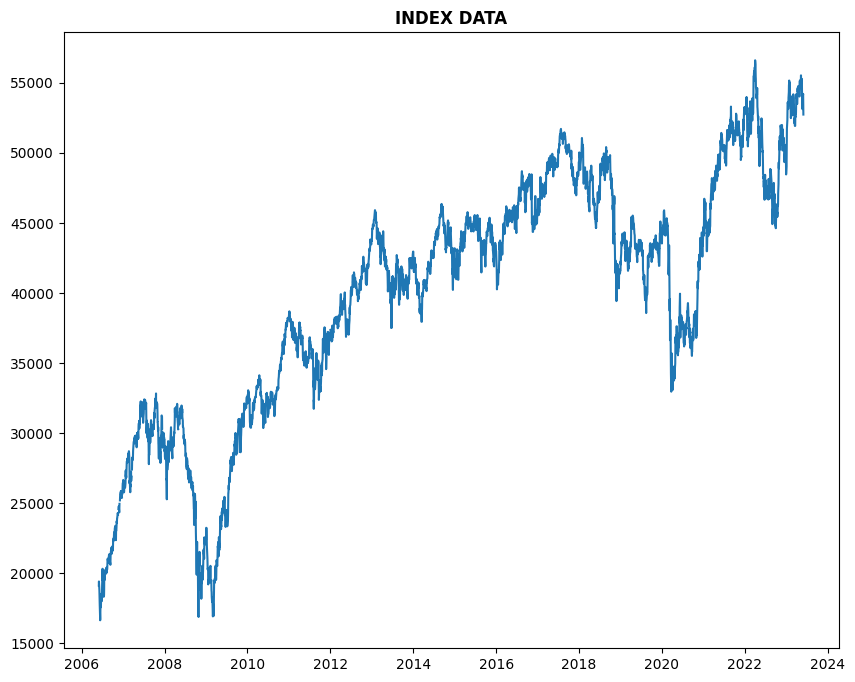

In [21]:
data = get_data()
infoData(data)

plt.figure(figsize=(10, 8))
plt.plot(data['index'])
plt.title('INDEX DATA', fontweight='bold')
plt.show()

In [22]:
def preprocess_data(dataSet):
    """
    Function to preprocess the data
    """

    local_dataSet = dataSet.dropna()
    columns_list = dataSet.columns.tolist()
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler.fit(local_dataSet)
    new_dataSet = min_max_scaler.transform(local_dataSet)

    new_dataSet = pd.DataFrame(np.round(new_dataSet,4), columns=columns_list)
    new_dataSet.index = local_dataSet.index

    return new_dataSet

def getCorr(dataSet):
    """
    Function to get correlation matrix
    """

    print(dataSet.head(10))
    print("")
    print(dataSet.describe())
    print("")

    plt.figure(figsize=(10, 8))
    sns.heatmap(dataSet.corr(), annot=True, cmap='coolwarm', fmt=".2f") # Calculate correlation on the DataFrame itself
    plt.title('CORRELATION MATRIX', fontweight='bold')
    plt.show()


             index      FX     GDP  CPI    RFR      UR     BOP    GFCF
Date                                                                  
2006-06-01  0.0620  0.0876  0.6075  0.0  0.515  0.4261  0.2708  0.6672
2006-06-02  0.0693  0.0927  0.6075  0.0  0.515  0.4261  0.2708  0.6672
2006-06-05  0.0576  0.0943  0.6075  0.0  0.515  0.4261  0.2708  0.6672
2006-06-06  0.0537  0.0910  0.6075  0.0  0.515  0.4261  0.2708  0.6672
2006-06-07  0.0441  0.0943  0.6075  0.0  0.515  0.4261  0.2708  0.6672
2006-06-08  0.0402  0.0989  0.6075  0.0  0.515  0.4261  0.2708  0.6672
2006-06-09  0.0274  0.0949  0.6075  0.0  0.515  0.4261  0.2708  0.6672
2006-06-12  0.0083  0.0999  0.6075  0.0  0.515  0.4261  0.2708  0.6672
2006-06-13  0.0000  0.1033  0.6075  0.0  0.515  0.4261  0.2708  0.6672
2006-06-14  0.0037  0.1006  0.6075  0.0  0.515  0.4261  0.2708  0.6672

             index           FX          GDP     CPI          RFR  \
count  4414.000000  4414.000000  4414.000000  4414.0  4414.000000   
mean     

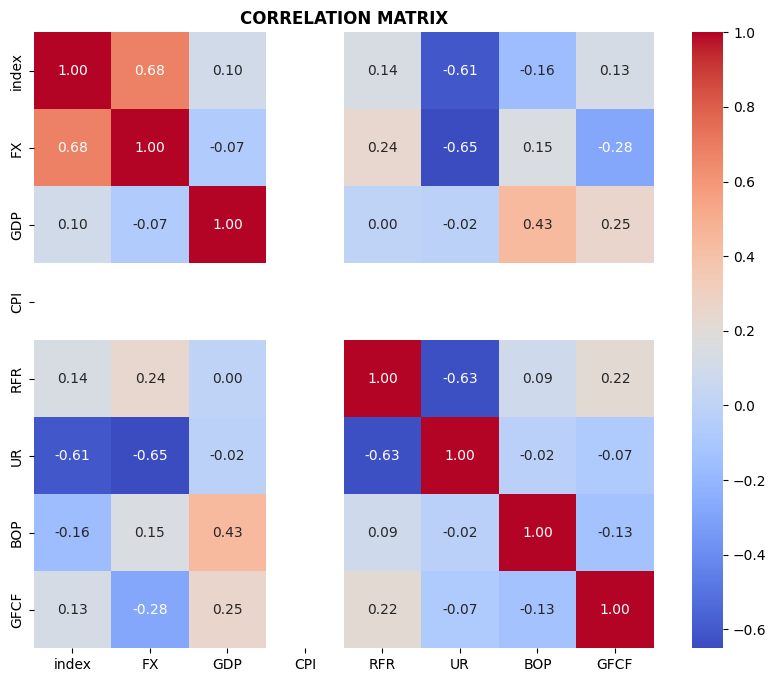

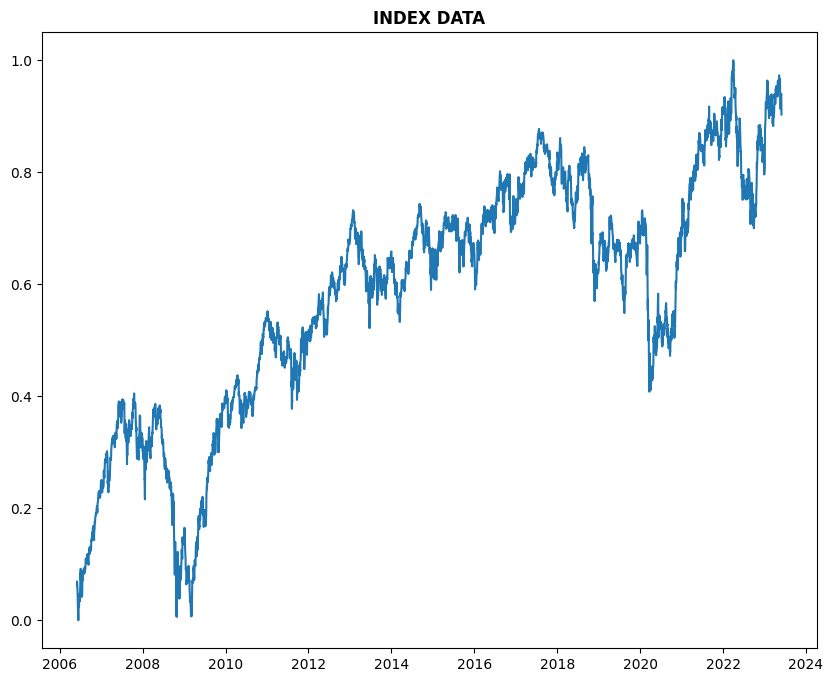

In [23]:
preprocessData = preprocess_data(data)
getCorr(preprocessData)

plt.figure(figsize=(10, 8))
plt.plot(preprocessData['index'])
plt.title('INDEX DATA', fontweight='bold')
plt.show()

In [24]:
def pca_Transformation(dataSet):
    features = dataSet
    features = features.drop(['index'], axis=1)

    # principal components analysis
    pca = sk.PCA(n_components=3)
    principalComponents = pca.fit_transform(features)
    principalComp = pd.DataFrame(data = principalComponents,
                                 columns = ['P. Comp. 1', 'P. Comp. 2', 'P. Comp. 3'])
    principalComp.set_index(dataSet.index,inplace = True, drop=True)
    principalComp['index'] = dataSet['index']
    cols = principalComp.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    principalComp = principalComp[cols]

    print("==========================================================")
    print("                 PCA ANALYSIS")
    print("----------------------------------------------------------")
    print(principalComp)
    print("\n")

    varRatio = (pca.explained_variance_ratio_)*100
    data = {'P. Comp. 1':varRatio[0],'P. Comp. 2':varRatio[1],'P. Comp. 3':varRatio[2]}
    dfVar = pd.DataFrame(data, index=['Exp Var Ratio %'])
    print(dfVar)
    print("\n")

    return principalComp

In [25]:
pcaData = pca_Transformation(preprocessData)
pcaData.head(10)

                 PCA ANALYSIS
----------------------------------------------------------
             index  P. Comp. 1  P. Comp. 2  P. Comp. 3
Date                                                  
2006-06-01  0.0620   -0.035697   -0.334203    0.038655
2006-06-02  0.0693   -0.038000   -0.330740    0.038814
2006-06-05  0.0576   -0.038723   -0.329653    0.038864
2006-06-06  0.0537   -0.037233   -0.331894    0.038761
2006-06-07  0.0441   -0.038723   -0.329653    0.038864
...            ...         ...         ...         ...
2023-05-25  0.9283   -0.797842   -0.300094    0.115257
2023-05-26  0.9353   -0.799197   -0.298057    0.115351
2023-05-29  0.9400   -0.792107   -0.308717    0.114862
2023-05-30  0.9182   -0.791972   -0.308921    0.114853
2023-05-31  0.9031   -0.793643   -0.306409    0.114968

[4414 rows x 4 columns]


                 P. Comp. 1  P. Comp. 2  P. Comp. 3
Exp Var Ratio %   54.967806   20.448765   11.531775




,index,P. Comp. 1,P. Comp. 2,P. Comp. 3
Date,,,,
2006-06-01,0.0620,-0.035697,-0.334203,0.038655
2006-06-02,0.0693,-0.038000,-0.330740,0.038814
2006-06-05,0.0576,-0.038723,-0.329653,0.038864
2006-06-06,0.0537,-0.037233,-0.331894,0.038761
2006-06-07,0.0441,-0.038723,-0.329653,0.038864
2006-06-08,0.0402,-0.040800,-0.326530,0.039007
2006-06-09,0.0274,-0.038994,-0.329246,0.038882
2006-06-12,0.0083,-0.041251,-0.325851,0.039038
2006-06-13,0.0000,-0.042787,-0.323542,0.039144


In [26]:
train_data, test_data = train_test_split(pcaData, test_size=0.25, shuffle=False)
print(train_data.head(15))
print("")
print(len(train_data))
print("")
print(test_data.head(15))
print("")
print(len(test_data))

             index  P. Comp. 1  P. Comp. 2  P. Comp. 3
Date                                                  
2006-06-01  0.0620   -0.035697   -0.334203    0.038655
2006-06-02  0.0693   -0.038000   -0.330740    0.038814
2006-06-05  0.0576   -0.038723   -0.329653    0.038864
2006-06-06  0.0537   -0.037233   -0.331894    0.038761
2006-06-07  0.0441   -0.038723   -0.329653    0.038864
2006-06-08  0.0402   -0.040800   -0.326530    0.039007
2006-06-09  0.0274   -0.038994   -0.329246    0.038882
2006-06-12  0.0083   -0.041251   -0.325851    0.039038
2006-06-13  0.0000   -0.042787   -0.323542    0.039144
2006-06-14  0.0037   -0.041568   -0.325375    0.039060
2006-06-15  0.0320   -0.040348   -0.327209    0.038976
2006-06-16  0.0348   -0.040394   -0.327141    0.038979
2006-06-19  0.0232   -0.041116   -0.326054    0.039028
2006-06-20  0.0282   -0.041974   -0.324764    0.039088
2006-06-21  0.0376   -0.039852   -0.327956    0.038941

3310

             index  P. Comp. 1  P. Comp. 2  P. Comp. 3
Dat

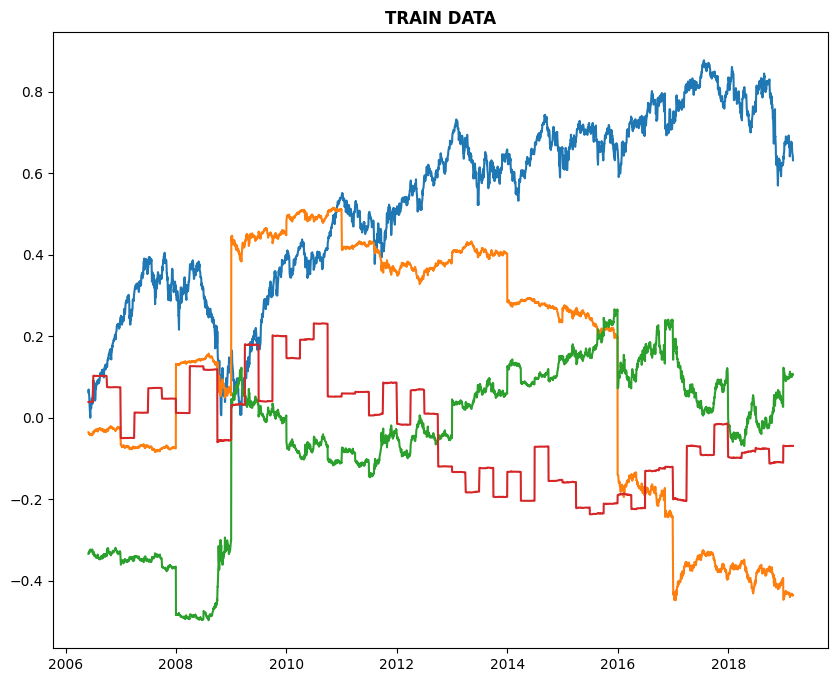

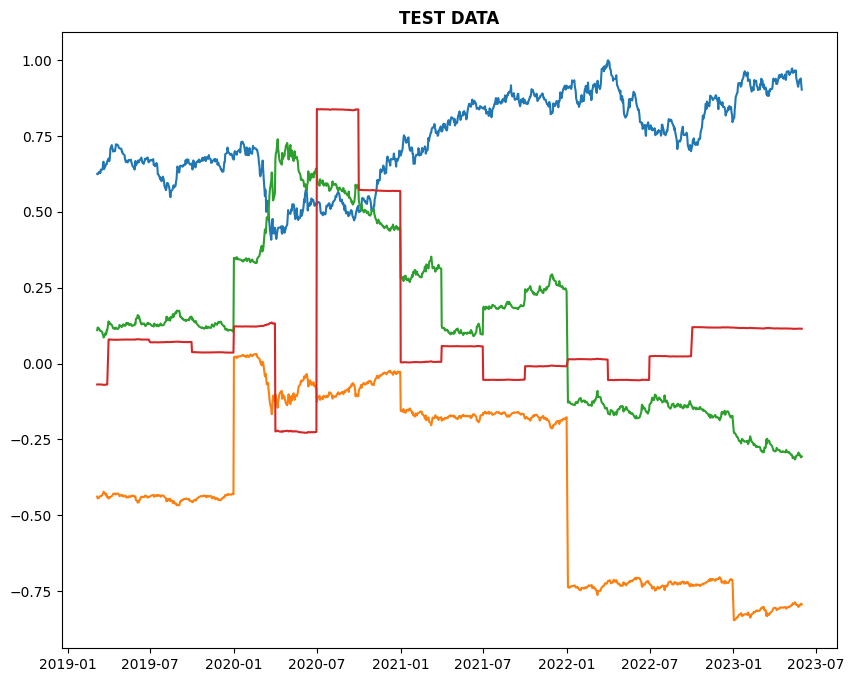

In [28]:
plt.figure(figsize=(10, 8))
plt.plot(train_data)
plt.title('TRAIN DATA', fontweight='bold')
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(test_data)
plt.title('TEST DATA', fontweight='bold')
plt.show()